<center><b>© 2020. Content is made available under the CC-BY-NC-ND 4.0 license<center>

*Géron, A. (2019) 2nd Ed. Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. O'Reilly Media, Inc.( ISBN-10: 1491962291)*

https://github.com/ageron/handson-ml2




###Housekeeping Notes:

Before you  start working with this notebook, you need to first "mount" your Google Drive in the runtime's Virtual Machine. This will allow you to read and save files from your own Google Drive. 

To do this, you need to provide the path of your Google Drive for  the folder of this assignment. Once you provide this information, run this code cell below and follow the instructions. 


In [0]:
import os
from google.colab import drive 

drive.mount('/content/gdrive')

Working_Directory = 'My Drive/CS_414_ML/Day3/LR_images' #@param {type:"string"}
wd="/content/gdrive/"+Working_Directory
os.chdir(wd)


dirpath = os.getcwd()
print("current directory is : " + dirpath)





Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
current directory is : /content/gdrive/My Drive/CS_414_ML/Day3/LR_images


**Chapter 1 – The Machine Learning landscape**

_This is the code used to generate some of the figures in chapter 1._

# Code example 1-1

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [0]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [0]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in datasets/lifesat.

In [0]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [0]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
# Download the data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [0]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]


# Select a linear model
model = sklearn.linear_model.LinearRegression()




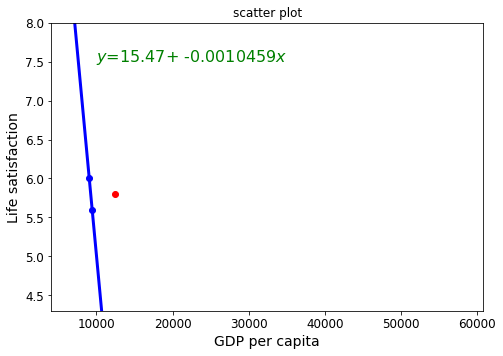

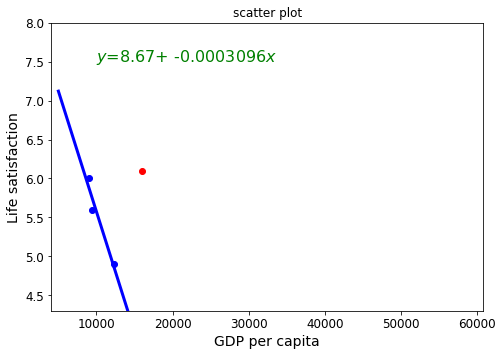

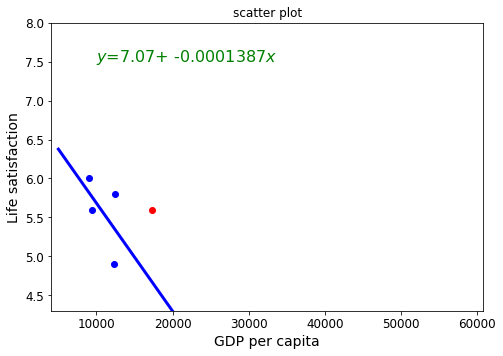

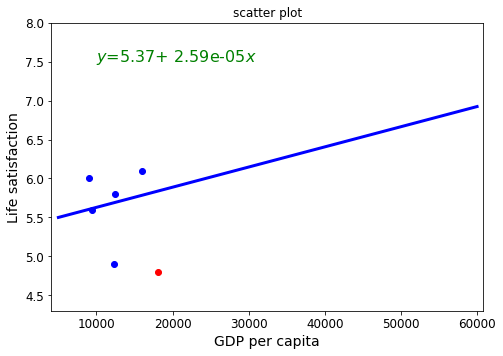

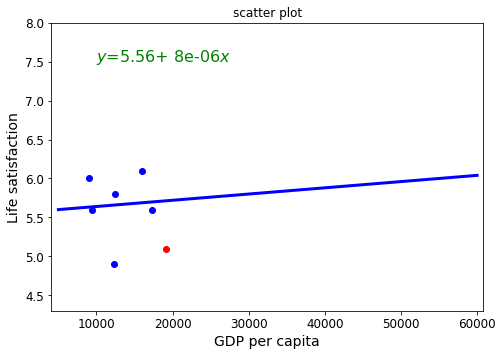

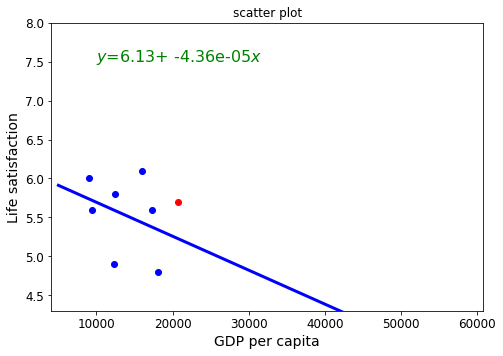

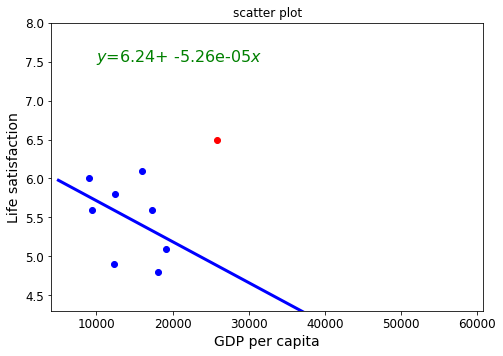

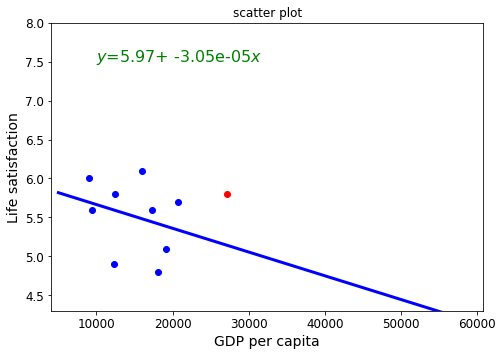

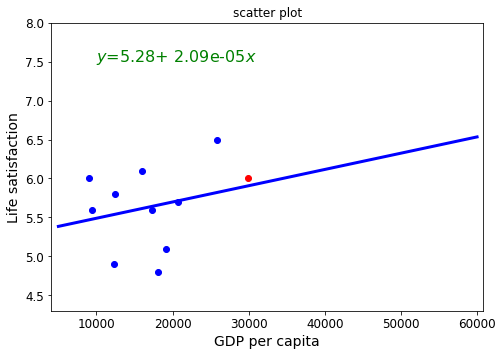

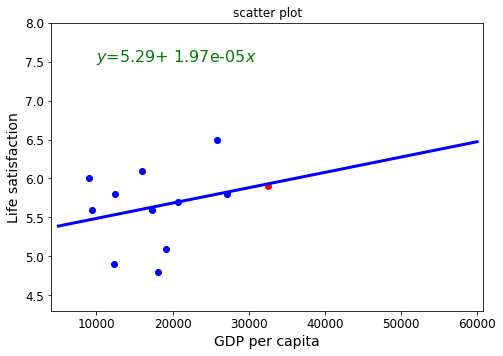

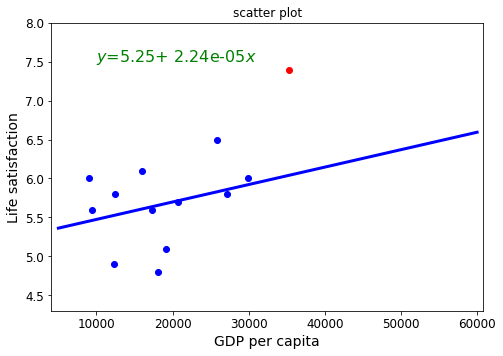

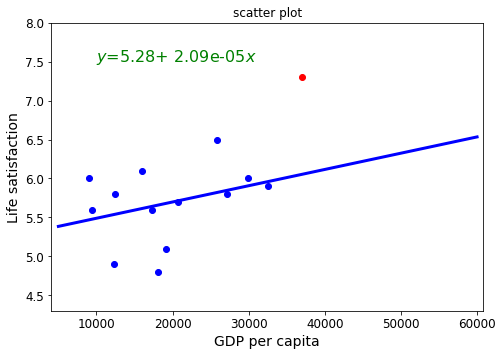

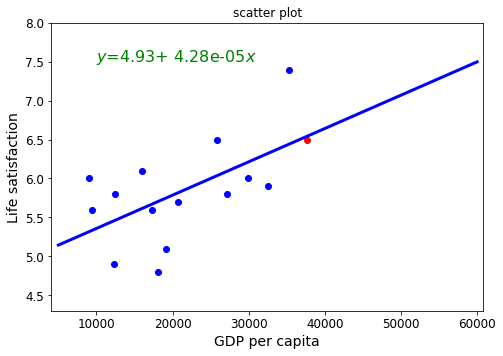

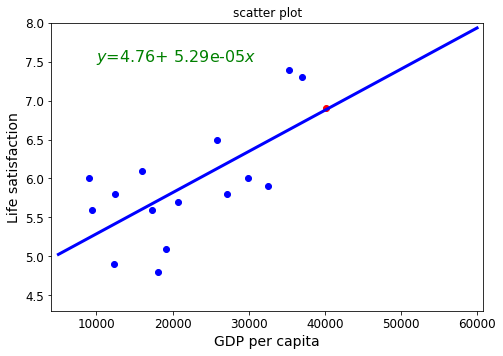

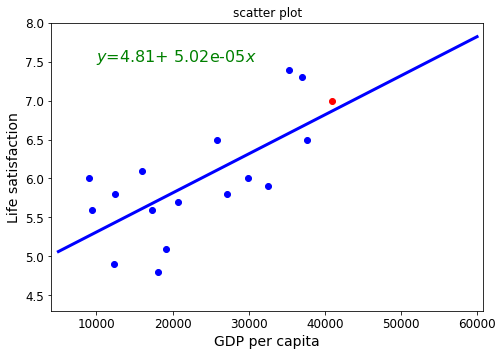

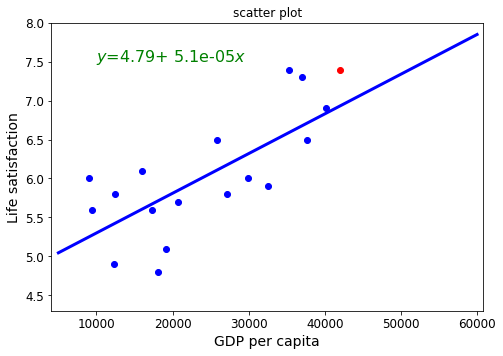

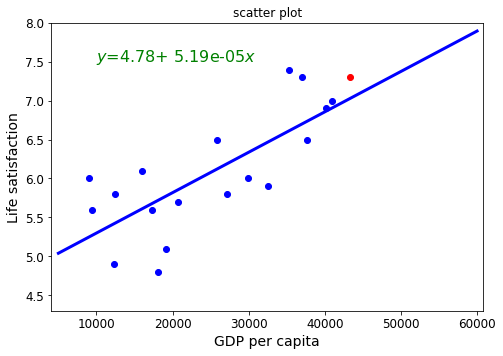

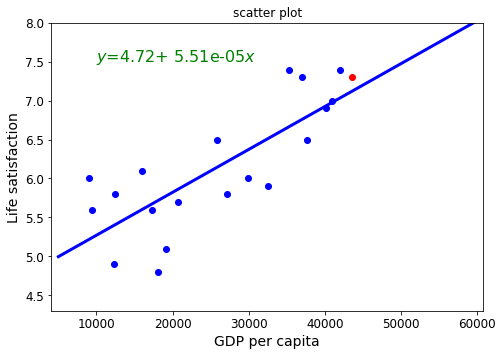

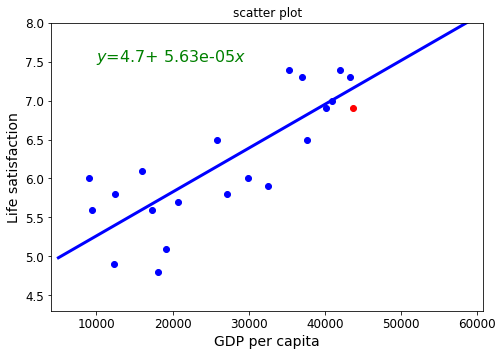

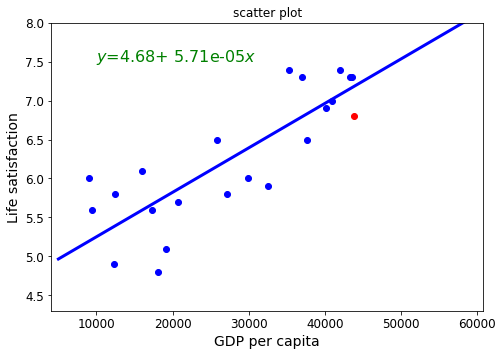

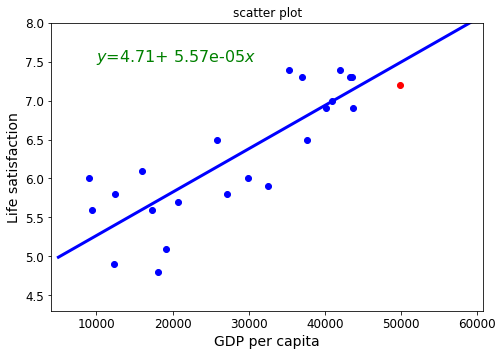

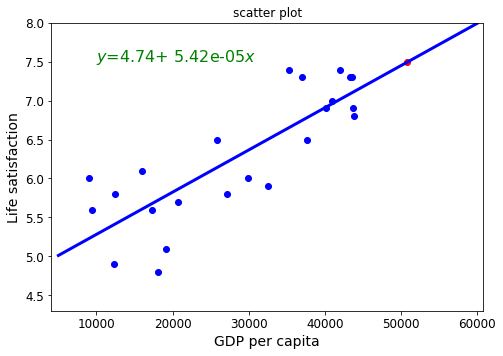

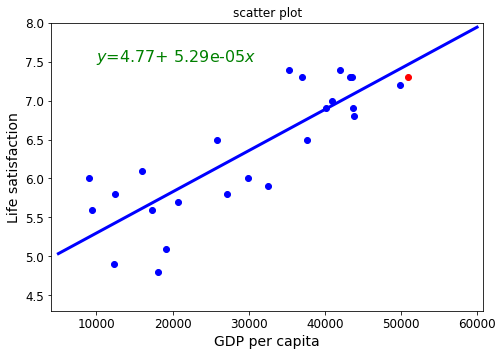

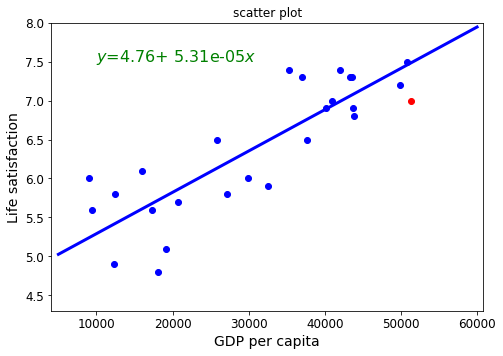

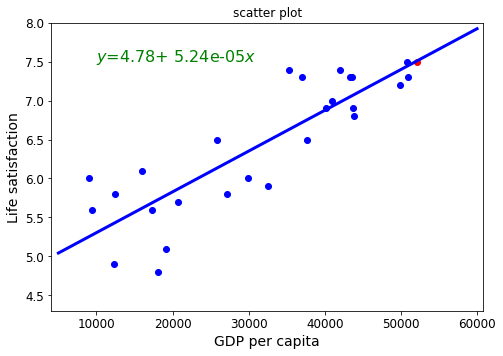

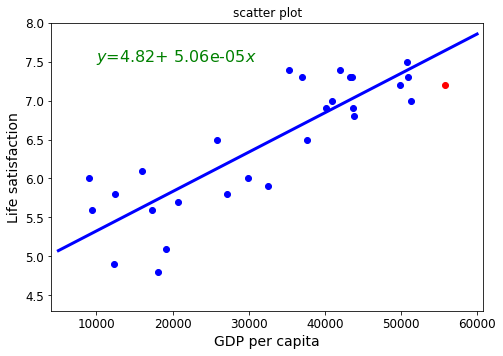

In [0]:
#Create images for "video" online training
for i in range(2,X.size-1):
  sub_X=X[range(i),]
  sub_y=y[range(i),]
  # Train the model
  model.fit(sub_X, sub_y)
  x_coe=(round(model.coef_[0][0],7))
  inter=round(model.intercept_[0],2)
  #Predict the model
  y_pred=model.predict(sub_X) 

  # Visualize the data

  fig=plt.figure()
  ax=fig.add_axes([0,0,1,1])
  ax.scatter(sub_X, sub_y, color='b')
  ax.scatter(X[i+1,],y[i+1,], color='r')
  ax.set_xlabel('GDP per capita')
  ax.set_ylabel('Life satisfaction')
  ax.set_title('scatter plot')

  plt.ylim(min(y)[0]-0.5, max(y)[0]+0.5)
  plt.xlim(min(X)[0]-5000, max(X)[0]+5000)
  new_y=[t1+inter for t1 in [x *x_coe  for x in [5000,60000]]]
  plt.plot([5000,60000], new_y, color='blue', linewidth=3)
  #plt.plot(sub_X, y_pred, color='blue', linewidth=3)
  plt.text(10000, 7.5, "$y$={0}+ {1}$x$".format(inter,x_coe), fontsize=16, color="g")

  plt.show()
  fig.savefig('plot{0}.png'.format(i))
